## CS345 Assignment 01

### September 21, 2021

In this assignment you are to gain experience with labeled data expressed as points in 2-Dimensions.  In particular you will become comfortable with notions of how to project from a higher (2-Dimensional) to a lower (1-Dimensional) space. Finally, some projections are more useful than others when it comes to seperating labeled classes. 

There are five parts to this assignment 

- Part 1: Example 2-Dimensional Lableded Gaussian Data
- Part 2: Histogram Feature Distribution
- Part 3: Three Class 2-Dimensional Gaussian Data
- Part 4: Class Means Seperation
- Part 5: Project from 2-Dimensional to 1-Dimensional Space
- Part 6: In 2-Dimensions Play Spin the Axis

A couple of requests. Please, once you have downloaded this notebook, create a copy with your last name added to the file name.  This will ultimately be the notebook you turn in for this assignment. Second, keep a clea copy of what you have downloaded.  This is important.  Note that outputs for code that has been removed is present in what you first download. This represents a huge hint as to what you code should generate.  As soon as you "Run All" on the notebook these hints will go away.



## Preamble - imports

The following imports are provided for you.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

## Part 1: Example 2-Dimensional Lableded Gaussian Data

To begin the goal is to create a labeled dataset in 2-Dimensions using the sklean [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) function. Please go read up on what this function does. 

Specifically, you are to write the internals for the function below.

In [ ]:
# Write Code

def make_2d_Gaussian_Clusters (n, cns, rseed) :
  X, y = make_blobs(n_samples=n, centers = cns, random_state = rseed)
  my_dict = {'X': X, 'y': y}
  return my_dict

In [ ]:
# Run Code

lp1 = make_2d_Gaussian_Clusters(200, np.array([[-1,1],[1,1]]), 7)
print('Type of the labeled problem returned is ', type(lp1))
print('Shape of the data is ', lp1['X'].shape)

Type of the labeled problem returned is  <class 'dict'>
Shape of the data is  (200, 2)


Now you are to write a function which generates a scatter plot of the labeled 2D data you have just created and bound to the variable `lp1 `. While you may start by writing this function to work with only a two class problem, keep in mind the same function shortly must work with both 2 and 3 class problems.  It is up to you how much you want to anticipate this generality on your first pass writing the code.

Here are some specifics to keep in mind.  First, read about [figsize](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). The scatter plot figure size here is 8 by 8. 

Next, your function should take up to three different classes and use the colors red, green, blue for the classes zero, one and two respectively. You can specify different symbols as well and so the symbols should be circle, triangle and upside down triangle for classes one, two and three respectively. 

One last thing, the aspect ratio of your plot should be such that one unit horizontal is  displayed the same length as one unit vertical. Ready about the plot argument [aspect](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_aspect.html)

In [ ]:
# Write Code

def display_2d_data(lp) :
    
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, aspect='equal')
    my_shapes = ['o', '^', 'v']
    my_colors = ['red','green','blue']
    color_lst = [my_colors[i] for i in lp['y']]
    shape_lst = [my_shapes[i] for i in lp['y']]
    if 2 in lp['y']:
      for i in range(3):
        ax.scatter(lp['X'][:,0][lp['y']==i], lp['X'][:,1][lp['y']==i], c =my_colors[i],marker = my_shapes[i], alpha = 0.75, s =50)
    else:
      for i in range(2):
        ax.scatter(lp['X'][:,0][lp['y']==i], lp['X'][:,1][lp['y']==i], c =my_colors[i],marker = my_shapes[i], alpha = 0.75, s =50)


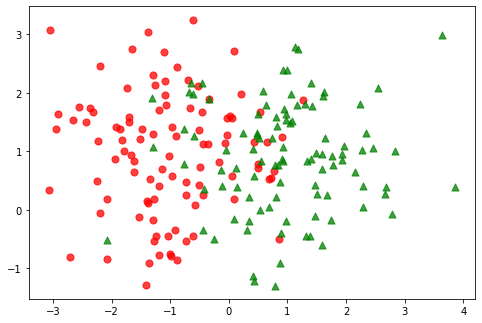

In [ ]:
# Run Code 

display_2d_data(lp1)

## Part 2: Histogram Feature Distribution

As has been discussed already in class, often in machine learning the goal is to discover a feature that seperates or at least somewhat seperates two classes.  In the above scatter plot you can already see a marked difference in how Feature 1 offers some degree of seperation and Feature 2 essentially none.  

One very good way to actually think about - and visualize - seperation is to histogram the feature values while color coding for the classes.  Next you will do this by filling in the code for the following function.  The arguments are:

<table>
    <tr><td>vals</td><td>A 1-Dimensional array of feature values for all classes.</td></tr>
    <tr><td>y</td><td>The class labels asscociated with the feature values.</td></tr>
    <tr><td>nbins</td><td>The number of histogram bins.</td></tr>
</table>

Use the same class color codes as used in the scatterplots above.

In [ ]:
# Write Code

def hist_1d_problem(vals, y, nbins, fname) :
  colors = ['red', 'green', 'blue']
  for i in range(y.max() + 1):
    if i == 0:
      plt.hist(vals[y==i], bins = nbins, range=(vals.min(), vals.max()), stacked= True, label = y, density=True, color= colors[i], alpha=0.7, edgecolor = 'black')
    else:
      plt.hist(vals[y==i], bins = nbins, range=(vals.min(), vals.max()), label = y, density=True, color= colors[i], alpha=0.7, edgecolor = 'black')

  plt.xlabel(fname, fontsize=12)
  plt.ylabel('Feature Density', fontsize=12)


When you have correctly implemented the above function the following code shows the histograms for Feature 1 and Feature 2 of the labeled data in ` lp1 `

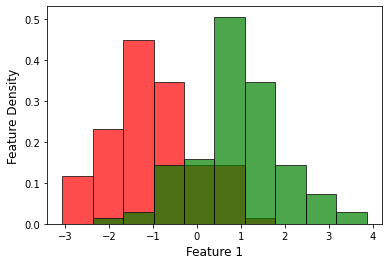

In [ ]:
# Run Code

hist_1d_problem(lp1['X'][:,0], lp1['y'], 10, 'Feature 1')

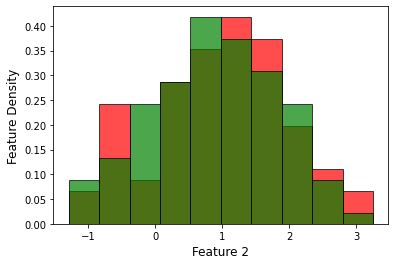

In [ ]:
# Run Code

hist_1d_problem(lp1['X'][:,1], lp1['y'], 10, 'Feature 2')

## Part 3: Three Class 2-Dimensional Gaussian Data

For what we want to accomplish below it will be better to have a three class labeled data problem.  Notice if you have written ` made_2D_Gaussian_Clusters ` correctly the following code will give us such a 3 class problem. 

Also notice, your ` dispay_2d-Data ` function will likewise plot all three classes as shown.

(300,)


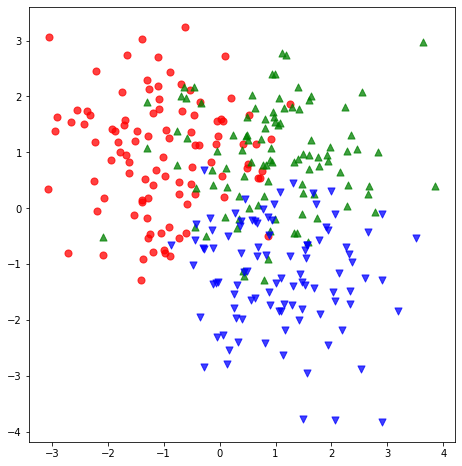

In [ ]:
# Run Code

lp2 = make_2d_Gaussian_Clusters(300, np.array([[-1,1],[1,1],[1,-1]]), 7)
print(lp2['y'].shape)
display_2d_data(lp2)

You may need to modify your code in function ` hist_1d_problem ` in order to support three classes. Once you have done these modifications you should get the following histograms showing the Feature 1 and Feature 2 distributions for three classes.

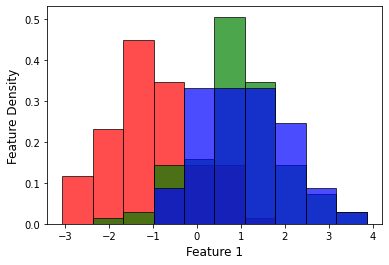

In [ ]:
# Run Code

hist_1d_problem(lp2['X'][:,0], lp2['y'], 10, 'Feature 1')

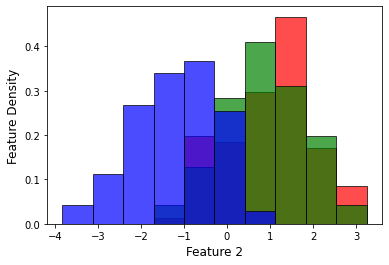

In [ ]:
# Run Code

hist_1d_problem(lp2['X'][:,1], lp2['y'], 10, 'Feature 2')

## Part 4: Class Means Seperation

As a step toward asking questions about how well distributions are separated it is important to compute the distance between class means. Since this is a 2-Dimensional dataset the class means are 2-points. Let us start there.

In [ ]:
# Write Code

def class_means (X, y) :
  
    a2D = np.array(  [np.mean(X[y==i], axis = 0) for i in range(y.max() + 1)] )

    
  # if 2 in y:
  #   a2D = np.zeros((3,2))
  #   sum = 0;
  #   for i in range(2):
  #     for j in range(3):
  #       column = X[:,i][y==j]
  #       for x in column:
  #         sum += x
  #       a2D[j,i] = sum/len(column)
  #       sum = 0
  #   return a2D
  # else:
  #   a2D = np.zeros((len(X[0]),2))
  #   sum = 0;
  #   for i in range(len(a2D)):
  #     for j in range(len(a2D[0])):
  #       column = X[:,i][y==j]
  #       for x in column:
  #         sum += x
  #       a2D[j,i] = sum/len(column)
  #       sum = 0
    return a2D

In [ ]:
# Run Code 

means = class_means(lp1['X'], lp1['y']) ; means

array([[-1.0292151 ,  0.97328576],
       [ 0.95668742,  0.89902774]])

In [ ]:
# Run Code 

means = class_means(lp2['X'], lp2['y']) ; means

array([[-1.0292151 ,  0.97328576],
       [ 0.95668742,  0.89902774],
       [ 1.07370361, -1.18902178]])

Consider one way to express the goal of seperating classes is to find a single dimension that makes the closest two classes move as far apart as possible. For the moment this may not seem like a goal for which we have a lot of options to choose from. To be precise, for the moment we can only choose between Feature 1 and Feature 2.  Rest assured we will consider more options soon. 

That said, for now consider just the much more mechanical question of just what it means to compute the smallest distance between pairs of classes. This in turn leads to the question of how simply to enumerate all pairs of classes. 

The following function, which you are being asked to write, does precisely that. Given there are ` k ` classes, return a list of lists containing all pairs of classes. Moreover, classes are denoted simply with integers (as done in the ` y ` vector) starting with zero.

In [ ]:
# Write Code

def all_pair_indices (k) :
  
  result = np.array([[j,i]  for i in range(k) for j in range(k) if i > j])
  # for i in range (k-1)??
      

  # result = np.transpose(result)
  return result



In [ ]:
# Run Code

print('Testing for two classes:   ', all_pair_indices(2))
print('Testing for three classes: ', all_pair_indices(3))
print('Testing for four classes:  ', all_pair_indices(4))


# Testing for two classes:    [[0, 1]]
# Testing for three classes:  [[0, 1], [0, 2], [1, 2]]
# Testing for four classes:   [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

Testing for two classes:    [[0 1]]
Testing for three classes:  [[0 1]
 [0 2]
 [1 2]]
Testing for four classes:   [[0 1]
 [0 2]
 [1 2]
 [0 3]
 [1 3]
 [2 3]]


For a particular dimension (Feature) the next function returns the smallest distance between a pair of class means.  To be clear, the argument ` mus ` is a vector of class means for a given dimension.  When saying distance, what we are saying more precisely is the absolute value of the difference between a pair of class means.  

In [ ]:
# Write Code

def min_seperation(mus) :
  min = 10000
  for i in range(len(mus) - 1):
    temp = abs(mus[i]-mus[i+1])
    if temp < min:
      min = temp
  return min


If you have implemented the above function correctly you should get the following results

In [ ]:
# Run Code

means = class_means(lp1['X'], lp1['y']) 
print('Two class problem Feature 1 min class seperation is ', min_seperation(means[:,0]))
print('Two class problem Feature 2 min class seperation is ', min_seperation(means[:,1]))

Two class problem Feature 1 min class seperation is  1.9859025110510715
Two class problem Feature 2 min class seperation is  0.07425801606245619


Go back and review the plot of the two class problem and think about what the large difference in magnitude for min speration is telling us about the class seperation for the two class problem.

While you are at it, go review the plot of the three class problem and think through the following answer for seperation for the three class problem

In [ ]:
# Run Code

means = class_means(lp2['X'], lp2['y']) 
print('Three class problem Feature 1 min class seperation is ', min_seperation(means[:,0]))
print('Three class problem Feature 2 min class seperation is ', min_seperation(means[:,1]))

Three class problem Feature 1 min class seperation is  0.11701619734549074
Three class problem Feature 2 min class seperation is  0.07425801606245541


## Part 5: Project from 2-Dimensional to 1-Dimensional Space

So far what we've seen for our three class problem is that at least two of the classes are not able to be seperated using either of the original features. Put another way, the horizontal axis - Feature 1 - seperates blue from red and green classes. However, the red and green have essentially the same distribution of Feature 1 values.  Moving to the vertical axis, the green class now stands out, but the red and blue classes become confused. 

What if we could find a dimension that did a better job of seperating all three classes from each other?

This question:  "Is there a better dimension/direction?" leads us directly to the concept of projection.  

Recall that any point in space $p$ can be projected onto a single dimension defined by a unit length vector $u$ with nothing more than a dot product.

$$
\alpha = p \cdot u
$$

To be clear, $\alpha$ is just a number.  It represents the position of $p$ as interpreted in the direction $u$. Alternatively, think of it this way.  If the space where $p$ is defined were rotated so that $u$ became the horizontal axis, then $\alpha$ is just the coordinate value of $p$ along the horizontal axis.

Because the following equivalence leads to vastly simpler code, recall that matrix multiplication is essentially a whole sequence of dot products. Therefore, the equation above can be equivalently written as 

$$
\alpha = p^T \; u
$$

In our present situation, where $p$ is a point in 2-Dimensions, $p^T$ is a $1 x 2$ matrix and $u$ is a $2 x 1$ matrix.

Finally, consider a matrix $X$ where each row contains a 2-Dimensional point.  The project of *all* the sample points projected onto the 1-Dimensional space defined by $u$ can be accomplised with a single matrix multiply.

$$
X^\prime = X \; u
$$

And for our 2-Dimensional example, recall we have already created a matrix $X$ with $150$ samples (the three class problem). In that case $X$ is a $150 x 2$ matrix. The result of the matrix multiplacation above is to return a $150 x 1$ matrix, each element is the projection of a sample point into the 1-Dimensional space defined by $u$.

At this point write the code to make this all happend. Namely, to create a 1-Dimensional dataset from a 2-Dimensional dataset using a direction $u$ (footnote, just in case, make sure $u$ is unit length before you do your projection).

In [ ]:
# Write Code

def project_onto (X, u) :
  
  u = u / np.linalg.norm(u)
  return X @ u


Tryout your projection function by projectiong the three class problem onto the direction defined by 

$$
u = [ 1, 1 ]
$$

Then plot the histgram of the classes for this 1-Dimensional dataset.

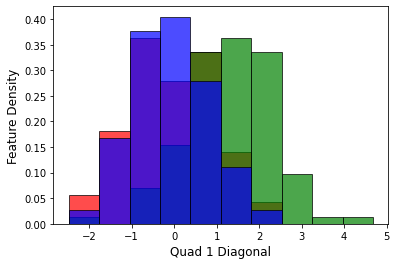

In [ ]:
# Run Code

Xp = project_onto(lp2['X'], np.array([1,1,]))
hist_1d_problem(Xp, lp2['y'], 10, 'Quad 1 Diagonal')

At this point take a moment - or perhaps several moments - and go back and look at the original scatter plot of the three classes.  Does what you are seeing in this histogram make sense to you? In particular, notice that the red and blue classes have values in this projection of the data which are nearly identically distributed. In contrast, the green class values are noticeably higher.  Does the green class stand out from the other two classes in the histograms above like it does here?

## Part 6: In 2-Dimensions Play Spin the Axis

From the above histogram it is clear that different choices of an axis onto which to project the data result in different degrees of class seperation.  That raises the question - which direction is best?

In the case of 2-dimensional data it is easy think about enumerating directions. In essence, consider the vector ` u ` defined as follows:

$$
u = [ \cos(\theta), \sin(\theta) ]^T
$$

In this part you are going to plot the min_seperation between the three classes constructed above as a function of theta.  To start, consider writing just the funciton that create the basis vectors. There will be one basis vector for each of a set of evenly spaced anges $\theta$. Note you are being given the code to create the angles in degrees.

In [ ]:
# Run Code

thetas_d = [theta for theta in range(0,180, 5)] ; thetas_d[:5]

[0, 5, 10, 15, 20]

The built in numpy trig functions take their arguments in radians, not degrees, convert from degrees to radian in the following code 

In [ ]:
# Write Code

thetas_r = [theta/180 * np.pi for theta in thetas_d]

In [ ]:
# Run Code

thetas_r[:5]

[0.0,
 0.08726646259971647,
 0.17453292519943295,
 0.2617993877991494,
 0.3490658503988659]

Next we need to create a 2-dimensional basis vector for each and every angle.  A note about language here, often the term "basis vector" is linked closely to what are called "orthogonal bases".  This is common, but not necessary, as this example is showing, basis vectors need not be orthogonal to each other.  Indeed, as we are doing, a large collection of different vectors may all be properly thought of as defining a 1-Dimensional space in which higher dimensional data may be projected (we are getting to the projection part soon)

In [ ]:
# Write Code

def angles_to_vectors (angles_r) :
  result = np.array([[np.cos(radians), np. sin(radians)] for radians in angles_r])
  return result


In [ ]:
# Run Code

dims = angles_to_vectors(thetas_r) ; dims[:5]

array([[1.        , 0.        ],
       [0.9961947 , 0.08715574],
       [0.98480775, 0.17364818],
       [0.96592583, 0.25881905],
       [0.93969262, 0.34202014]])

In [ ]:
# Write Code

def project_onto_dims (lp, dims) :
  return np.matmul(lp['X'], np.transpose(dims))



In [ ]:
# Run Code

Xps = project_onto_dims(lp2, dims)
Xps.shape

(300, 36)

The next bit of code is being given to you in hopes it avoids some struggling.  Note the purpose of these to functions is to neatly display the class means for each of the dimensions created above, i.e. all $36$ different vectors defining possible 1-Dimensional spaces.  

Look carefully through the printed listing and think about how the class means are shifting.

In [ ]:
# Run Code

def reduce_precision (lst, factor) :
    '''Will take a list of floating point numbers and discard excess precision.
    
    For example, if factor is 100 then only the first two values after the decimal
    point are retained.  If 1000 then three values to the right, etc.'''
    new = [(round(i * factor) / factor) for i in lst]
    return new

def print_means(lp, dims) :
    Xps = project_onto_dims(lp, dims)
    for i in range(dims.shape[0]) :
        Xp = Xps[:,i]
        ms = reduce_precision(class_means(Xp, lp['y']), 100)
        u  = reduce_precision(dims[i,:], 100)
        print(f'u vector {u}\t creates class means {ms}')

In [ ]:
print_means(lp2, dims)

u vector [1.0, 0.0]	 creates class means [-1.03, 0.96, 1.07]
u vector [1.0, 0.09]	 creates class means [-0.94, 1.03, 0.97]
u vector [0.98, 0.17]	 creates class means [-0.84, 1.1, 0.85]
u vector [0.97, 0.26]	 creates class means [-0.74, 1.16, 0.73]
u vector [0.94, 0.34]	 creates class means [-0.63, 1.21, 0.6]
u vector [0.91, 0.42]	 creates class means [-0.52, 1.25, 0.47]
u vector [0.87, 0.5]	 creates class means [-0.4, 1.28, 0.34]
u vector [0.82, 0.57]	 creates class means [-0.28, 1.3, 0.2]
u vector [0.77, 0.64]	 creates class means [-0.16, 1.31, 0.06]
u vector [0.71, 0.71]	 creates class means [-0.04, 1.31, -0.08]
u vector [0.64, 0.77]	 creates class means [0.08, 1.3, -0.22]
u vector [0.57, 0.82]	 creates class means [0.21, 1.29, -0.36]
u vector [0.5, 0.87]	 creates class means [0.33, 1.26, -0.49]
u vector [0.42, 0.91]	 creates class means [0.45, 1.22, -0.62]
u vector [0.34, 0.94]	 creates class means [0.56, 1.17, -0.75]
u vector [0.26, 0.97]	 creates class means [0.67, 1.12, -0.87]
u 

Now your turn, write the following function to print out the minimum class seperation for each of the different directions

In [ ]:
# Write Code

def reduce (lst, factor) :
    return round(lst * factor) / factor

def print_seperation(lp, dims) :
  Xps = project_onto_dims(lp, dims)
  for i in range(dims.shape[0]) :
        Xp = Xps[:,i]
        ms = reduce_precision(class_means(Xp, lp['y']), 100)
        u  = reduce_precision(dims[i,:], 100) 
        minimum = reduce(min_seperation(class_means(Xp, lp['y'])),100)
        print(f'u vector {u}\t creates min class seperation {minimum}')


In [ ]:
print_seperation(lp2, dims)

u vector [1.0, 0.0]	 creates min class seperation 0.12
u vector [1.0, 0.09]	 creates min class seperation 0.07
u vector [0.98, 0.17]	 creates min class seperation 0.25
u vector [0.97, 0.26]	 creates min class seperation 0.43
u vector [0.94, 0.34]	 creates min class seperation 0.6
u vector [0.91, 0.42]	 creates min class seperation 0.78
u vector [0.87, 0.5]	 creates min class seperation 0.94
u vector [0.82, 0.57]	 creates min class seperation 1.1
u vector [0.77, 0.64]	 creates min class seperation 1.25
u vector [0.71, 0.71]	 creates min class seperation 1.35
u vector [0.64, 0.77]	 creates min class seperation 1.22
u vector [0.57, 0.82]	 creates min class seperation 1.08
u vector [0.5, 0.87]	 creates min class seperation 0.93
u vector [0.42, 0.91]	 creates min class seperation 0.77
u vector [0.34, 0.94]	 creates min class seperation 0.61
u vector [0.26, 0.97]	 creates min class seperation 0.44
u vector [0.17, 0.98]	 creates min class seperation 0.27
u vector [0.09, 1.0]	 creates min clas

Please review the minimum class seperations in the printed listing above.  You should have no difficulty recognizing the $u$ vector that best seperates the three classes.

The last think to do is write the code to automatically find that particular vector.

In [ ]:
# Write Code

def find_best_dim(lp, dims) :
  Xps = project_onto_dims(lp, dims)
  max = 0
  save = 0
  for i in range(dims.shape[0]) :
        Xp = Xps[:,i]
        means = class_means(Xp,lp['y'])
        minimum = np.array([0.0])
        minimum[0] = min_seperation(means)
        if (max < reduce_precision(minimum, 100)[0]):
          max = reduce_precision(minimum, 100)[0]
          save = i
  return save




In [ ]:
# Run Code

print('Greatest class seperation is for dimension defined by')
reduce_precision(dims[find_best_dim(lp2, dims),:],10000)

Greatest class seperation is for dimension defined by


[-0.7071, 0.7071]

## The End